## Classify the tomato leaves if they are having disease or are healthy using CNN model. Use training and test data. Data Link is given above.

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# LOad Data by Generator

Generator can create random variations in the given images for generalization of training

In [5]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/PROJECTSS/Data Science Projects/Proj4- Leaves Detection/train_small1",
                                          target_size=(150,150),
                                          batch_size = 8, class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/MyDrive/PROJECTSS/Data Science Projects/Proj4- Leaves Detection/val_small1",
                                          target_size=(150,150),
                                          batch_size = 8,
                                          class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'bacteria_spot': 0, 'healthy': 1}

###Sequential model

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for BACTERIA or 1 for HEALTHY 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

###Fit the model

In [9]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 10,
         epochs = 100,
         validation_data = test_dataset
       
         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 44s 4s/step - loss: 0.7694 - accuracy: 0.3750 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 0.6879 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.8333
Epoch 3/100
10/10 [==============================] - 8s 793ms/step - loss: 0.6423 - accuracy: 0.6875 - val_loss: 0.6096 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 7s 714ms/step - loss: 0.6641 - accuracy: 0.6375 - val_loss: 0.5396 - val_accuracy: 0.8444
Epoch 5/100
10/10 [==============================] - 6s 560ms/step - loss: 0.4449 - accuracy: 0.7375 - val_loss: 0.3085 - val_accuracy: 0.8556
Epoch 6/100
10/10 [==============================] - 5s 494ms/step - loss: 0.4421 - accuracy: 0.8000 - val_loss: 0.2884 - val_accuracy: 0.9222
Epoch 7/100
10/10 [==============================] - 5s 494ms/step - loss: 0.3624 - accuracy: 0.8000 - val_loss: 0.2292 - val_accuracy: 0.9333
Epo

In [10]:
def predictImage(filename):
    pimg = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(pimg)
 
    Y = image.img_to_array(pimg)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("HEALTHY",fontsize=30)
    elif val == 0: 
        plt.xlabel("BACTERIA",fontsize=30)

[[1.]]


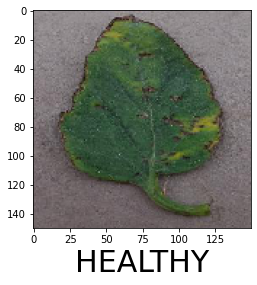

In [11]:
predictImage(r"/content/drive/MyDrive/PROJECTSS/Data Science Projects/Proj4- Leaves Detection/val_small1/bacteria_spot/0ab41c2e-c6fc-4ef1-9ffb-ce1b241d32be___GCREC_Bact.Sp 3426.JPG")

[[0.]]


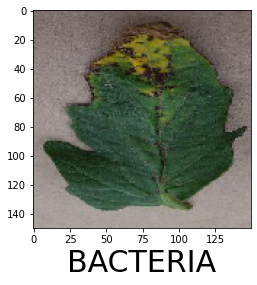

In [26]:
predictImage(r"/content/drive/MyDrive/PROJECTSS/Data Science Projects/Proj4- Leaves Detection/val_small1/bacteria_spot/0c2ee2f1-e725-4031-96ea-57e3b8b626b3___GCREC_Bact.Sp 5645.JPG")

[[1.]]


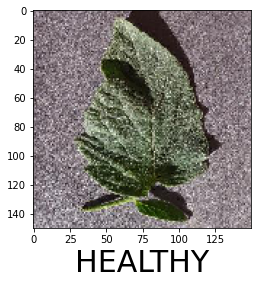

In [27]:
predictImage(r"/content/drive/MyDrive/PROJECTSS/Data Science Projects/Proj4- Leaves Detection/val_small1/healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG")